<a href="https://colab.research.google.com/github/pkhurt/computer-vision-course/blob/main/section_4_30_image_processing_histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histograms
## Definition
A histogram is a visual representation of the distribution of a continuous feature.

## Trend
continous trend of the histogram

## Histograms for images
* Display the frequency with three histograms. For each channel (RGB) one histogram to see how much color is in the image
* Can be displayed on top of each other

In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

DATA_DIR = "/content/drive/MyDrive/udemy/python_for_computervision_opencv/DATA/"

In [65]:
def read_image(img):
  image = cv2.imread(DATA_DIR + img)
  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [66]:
# A lot of black and brown, very rare white etc
dark_horse = cv2.imread(DATA_DIR + "horse.jpg") # ORIGINAL BGR OPENCV
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # CONVERTED TO RGB TO SHOW

# very colorful so the expectation is that all channels have a high number of pixels
rainbow = cv2.imread(DATA_DIR + "rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

# brick image with a lot of blue
blue_bricks = cv2.imread(DATA_DIR + "bricks.jpg")
show_bricks = cv2.cvtColor(bricks, cv2.COLOR_BGR2RGB)

In [67]:
# channel 0 means blue channel because of BGR channel list
# mask None means we want to apply to the whole picture
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])

In [68]:
hist_values.shape

(256, 1)

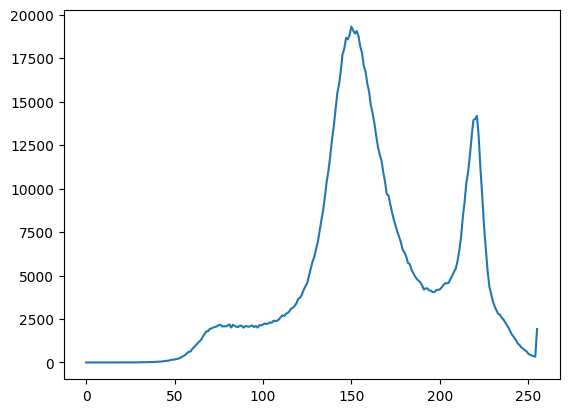

In [69]:
plt.plot(hist_values)

In [70]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256])

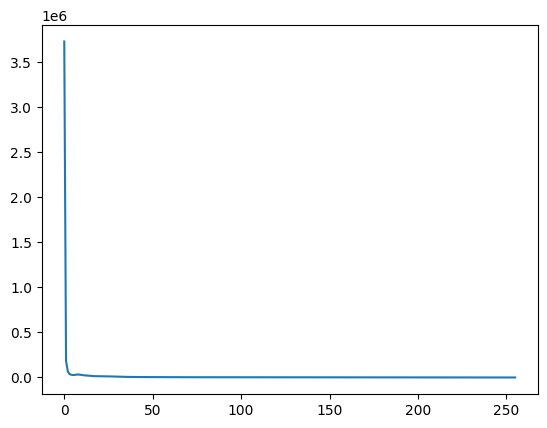

In [71]:
plt.plot(hist_values)
# Observation: Almost no blue pixels in the dark horse picture. This results in a histogram
# that has a high peak at 0 in the blue channel!

In [72]:
# Let's calculate the histogram for all of the channels (meaning, three histograms)
img = dark_horse

Text(0.5, 1.0, 'Three histograms')

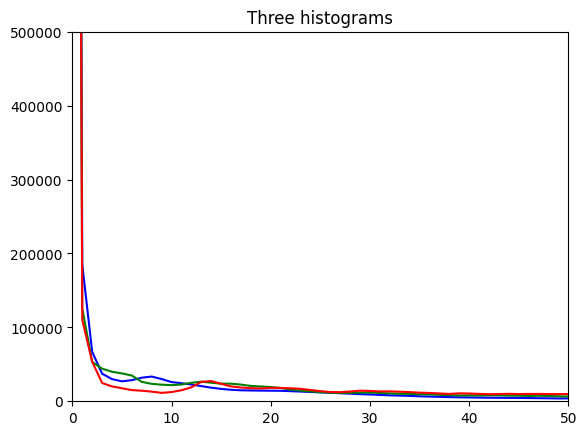

In [73]:
color = ("b", "g", "r") # OPENCV Order
for i, col in enumerate(color):
  histr = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(histr, color=col)
  plt.xlim([0,50])
  plt.ylim([0,500000])

plt.title("Three histograms")

## Histogram Mask & Equalization
Using a mask means that only a part of the image is represented in a histogram.

Equalization:

Histogram equalization is a method of contrast adjustment based on the images's histogram. Just like we've done with the gamma intensity adjustment.

After histogram equalization the contrast of an image is way higher

In [74]:
rainbow = cv2.imread(DATA_DIR + "rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [75]:
img = rainbow
img.shape

(550, 413, 3)

In [76]:
mask = np.zeros(img.shape[:2], np.uint8)

In [77]:
mask[300:400,100:400] = 255

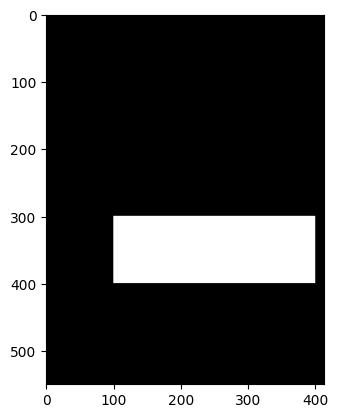

In [78]:
plt.imshow(mask, cmap="gray")

In [79]:
# plt.imshow(show_rainbow)
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [80]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask) # only for visualization purposes

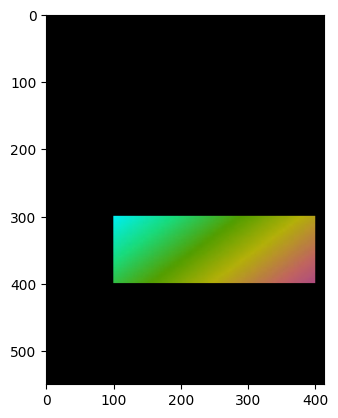

In [81]:
plt.imshow(masked_img)

In [82]:
hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256]) # Channels are again BGR
hist_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256]) # Channels are again BGR

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

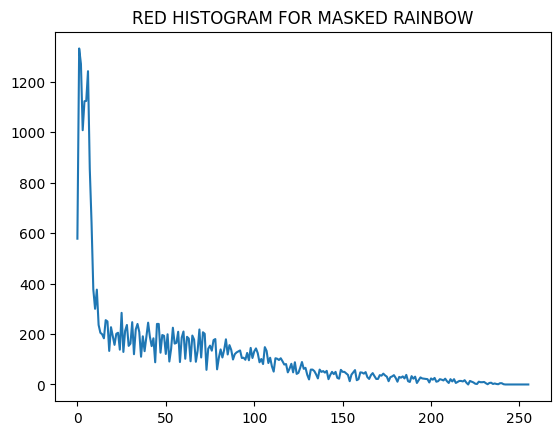

In [83]:
plt.plot(hist_mask_values_red)
plt.title("RED HISTOGRAM FOR MASKED RAINBOW")

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

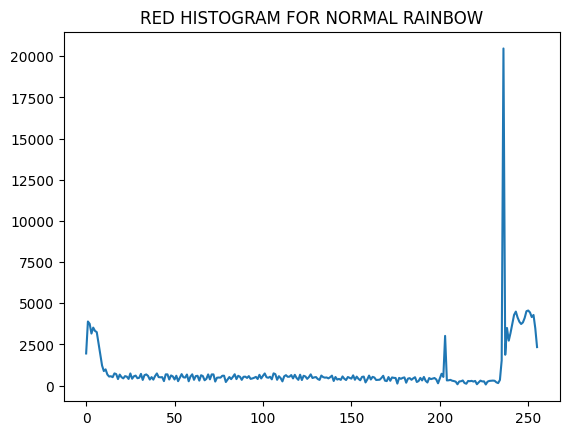

In [84]:
plt.plot(hist_values_red)
plt.title("RED HISTOGRAM FOR NORMAL RAINBOW")

In [85]:
def display(img, cmap=None):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap)

In [89]:
gorilla = cv2.imread(DATA_DIR + "gorilla.jpg", 0)

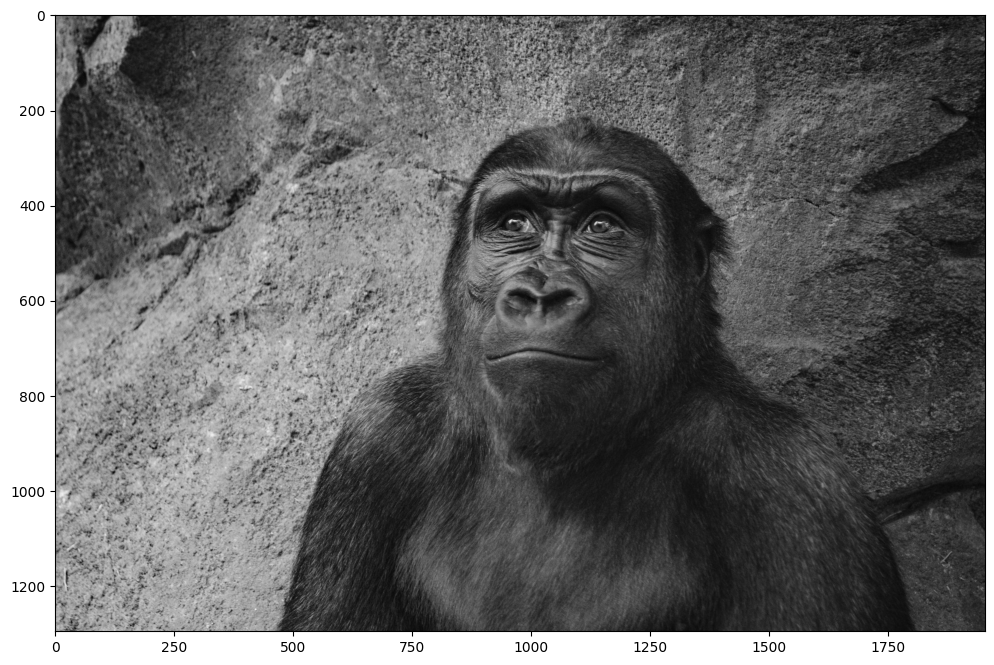

In [90]:
display(gorilla, cmap="gray")

In [92]:
gorilla.shape

(1295, 1955)

In [93]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])

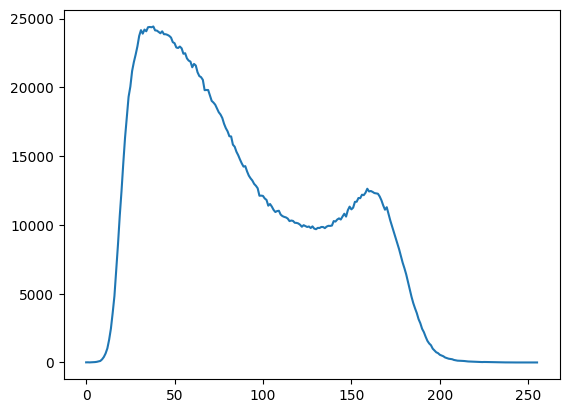

In [94]:
plt.plot(hist_values)

In [97]:
eq_gorilla = cv2.equalizeHist(gorilla)

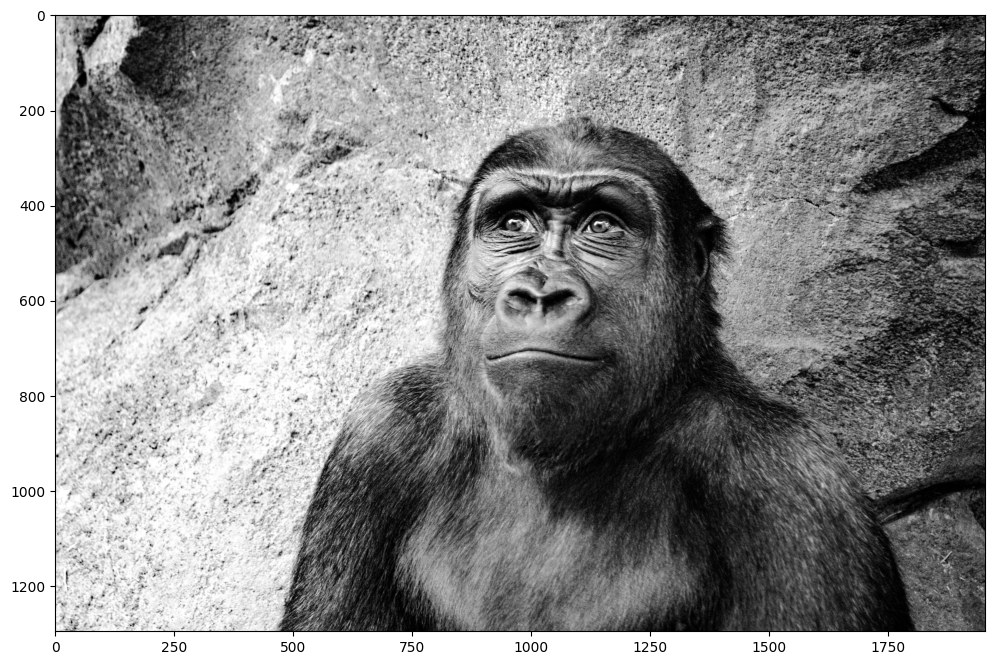

In [98]:
display(eq_gorilla, cmap="gray")

In [99]:
hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])

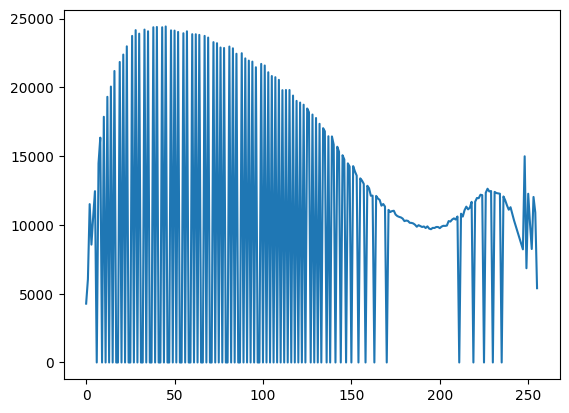

In [100]:
plt.plot(hist_values)
# observation: Differences between values is much shallower

In [107]:
# This can also be done in the color image -> we will need to transform the
# Color from BGR to HSV
color_gorilla = cv2.imread(DATA_DIR + "gorilla.jpg")
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

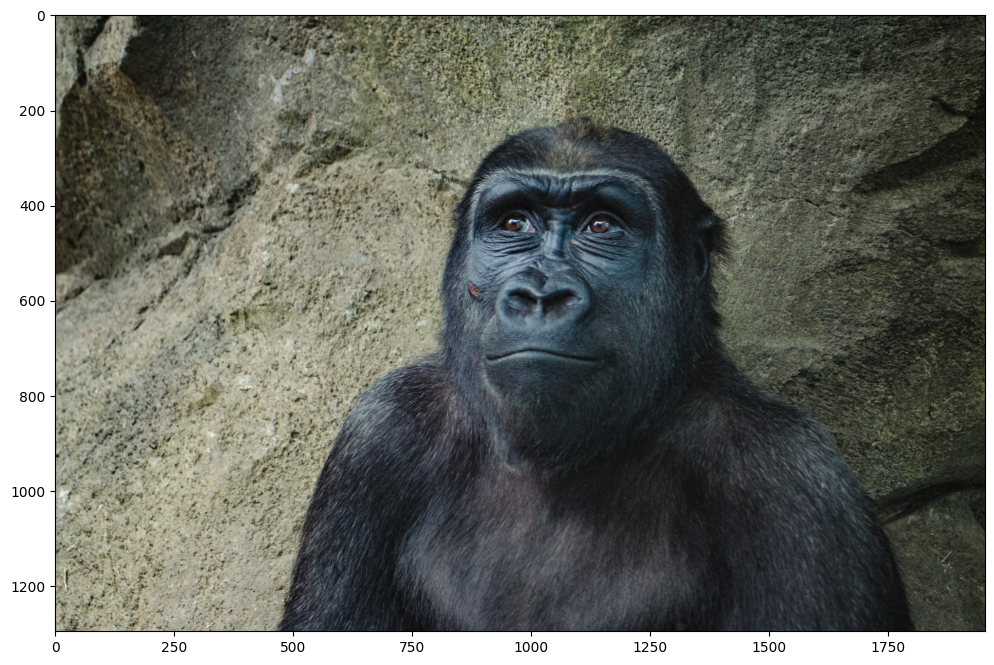

In [104]:
display(show_gorilla)

In [105]:
# First transformation to HSV color room
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [106]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2]) # equalize and replace original values of hsv channel 3

In [109]:
eq_color_gorilla = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)

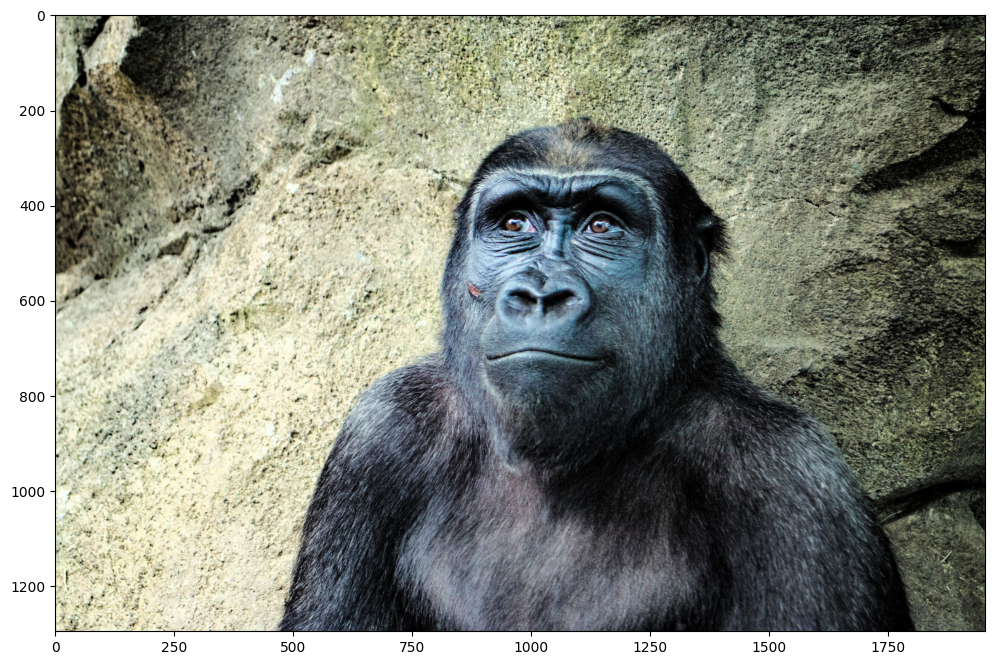

In [110]:
display(eq_color_gorilla)
# Observation: Much more contrast than the original image